In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Salary.csv', sep=',',index_col=None, header=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [5]:
df.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0
6683,26.0,Female,0,Sales Executive,1.0,35000.0,Canada,Black,0


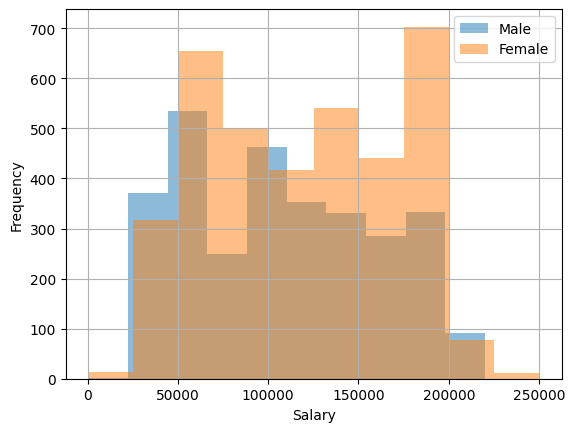

In [8]:
#This histogram shows that the frequency of women earning a high salary is higher than that of men.
#Cet histogramme montre que la fréquence des femmes gagnant un salaire élevé est plus grande que celle des hommes.

df.groupby('Gender')['Salary'].hist(alpha=0.5)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(df['Gender'].unique())
plt.show()

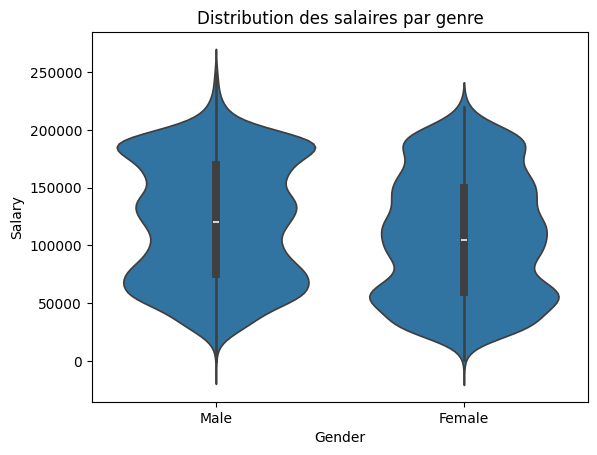

In [13]:
#The median salary for men is higher than that for women. This means that when you rank the salaries of men and women from lowest to highest, the median salary for men (i.e., the salary that falls in the middle of the distribution) is higher than that for women. Additionally, the first quartile (Q1) and third quartile (Q3) of men's salaries are higher than those of women, indicating that men's salaries are more concentrated in a higher range of values compared to women's salaries.
#La médiane du salaire des hommes est plus élevée que celle des femmes. Cela signifie que, lorsque vous classez les salaires des hommes et des femmes du plus bas au plus élevé, le salaire médian des hommes (c'est-à-dire le salaire qui se situe au milieu de la distribution) est plus élevé que celui des femmes.#Q1 (premier quartile) et Q3 (troisième quartile) des salaires des hommes sont plus élevés que ceux des femmes, cela signifie que les salaires des hommes sont plus concentrés dans une fourchette de valeurs plus élevées par rapport aux salaires des femmes.
#Le premier quartile (Q1) et le troisième quartile (Q3) des salaires des hommes sont plus élevés que ceux des femmes. Cela signifie que les salaires des hommes sont plus concentrés dans une fourchette de valeurs plus élevées par rapport aux salaires des femmes.
sns.violinplot(x='Gender', y='Salary', data=df)
plt.title('Distribution des salaires par genre')
plt.show()

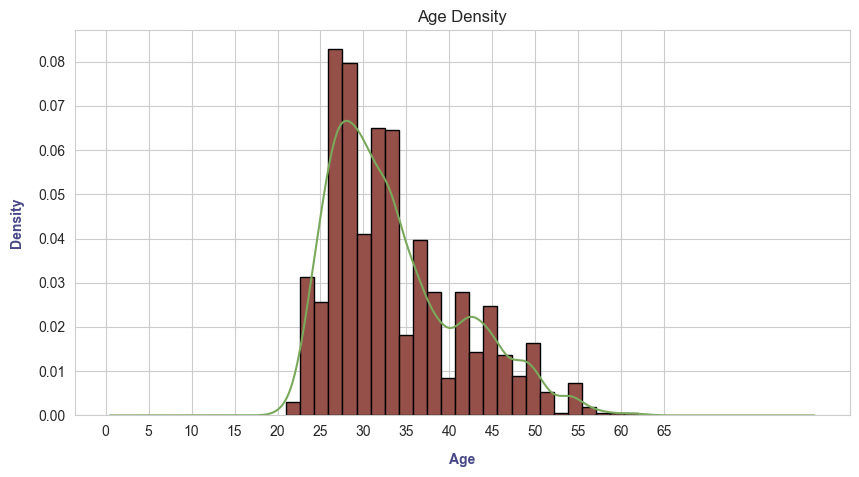

In [33]:
#The majority of the studied population is aged between 25 and 35 years old.
#La majorité de la population étudiée est âgée entre 25 et 35 ans.
plt.figure(figsize = (10, 5))
plt.hist(df["Age"], bins = 25, edgecolor = "black", color = "#955149", density = True)
df["Age"].plot(kind = "kde", color = "#7AA95C")
plt.xlabel("Age", fontsize = 10, weight = "bold", color = "#474787", labelpad = 10)
plt.ylabel("Density", fontsize = 10, weight = "bold", color = "#474787", labelpad = 10)
plt.title("Age Density")
plt.xticks(np.arange(0, max(df["Age"]) + 5, 5))
plt.show()

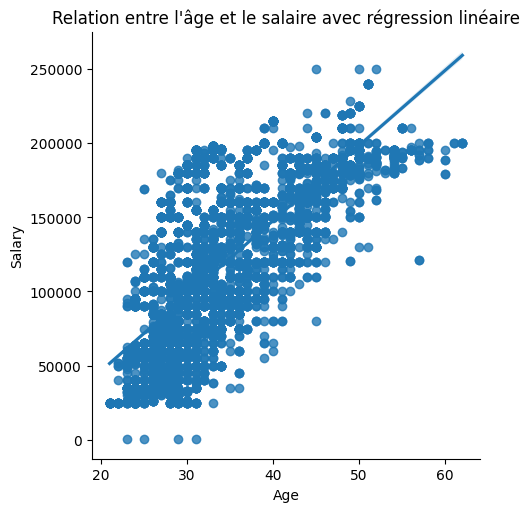

In [14]:
#Les personnes ayant des salaires élevés ont entre 45 et 53 ans.
sns.lmplot(x='Age', y='Salary', data=df)
plt.title('Relation entre l\'âge et le salaire avec régression linéaire')
plt.show()

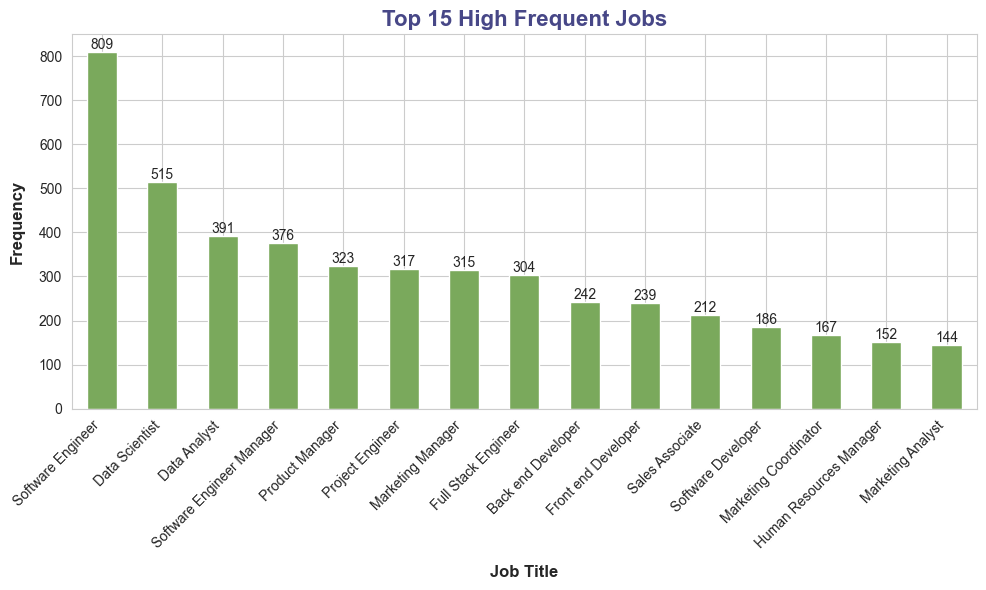

In [34]:
#Les ingénieurs logiciels sont les plus fréquents dans l'ensemble de données.
top_15_data = df['Job Title'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
bars = top_15_data.plot(kind='bar', color = "#7AA95C", rot=0)
plt.title('Top 15 High Frequent Jobs', fontsize = 16, weight = 'bold',color = "#474787")
plt.xlabel('Job Title', fontsize = 12, weight = "bold", labelpad = 10)
plt.ylabel('Frequency', fontsize = 12, weight = "bold", labelpad = 10)
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars.patches, top_15_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()

C:\Users\pc\AppData\Local\Temp\ipykernel_17752\3968516178.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_job_titles, x='Salary', y='Job Title', palette='viridis')


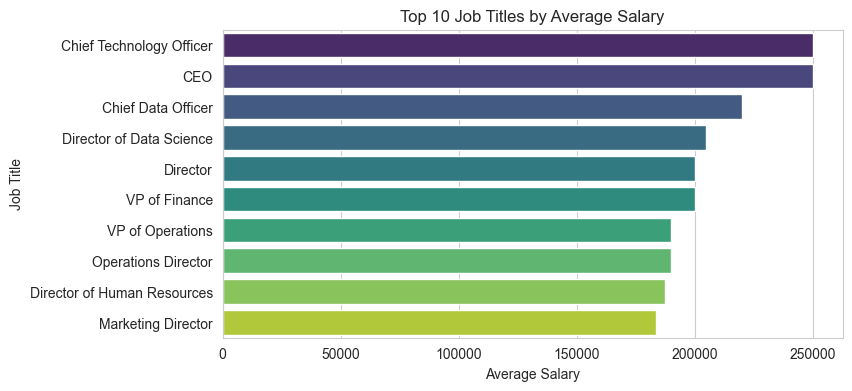

In [15]:
#Le salaire le plus élevé est celui du chef de la technologie (Chief Technology Officer).

# Calculate the average salary for each job title
average_salary_by_job = df.groupby('Job Title')['Salary'].mean().reset_index()

# Sort the average salaries in descending order
sorted_average_salary = average_salary_by_job.sort_values(by='Salary', ascending=False)

# Select the top N job titles
top_n = 10  # Adjust the number to display more or fewer top job titles
top_job_titles = sorted_average_salary.head(top_n)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=top_job_titles, x='Salary', y='Job Title', palette='viridis')
plt.title(f'Top {top_n} Job Titles by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()


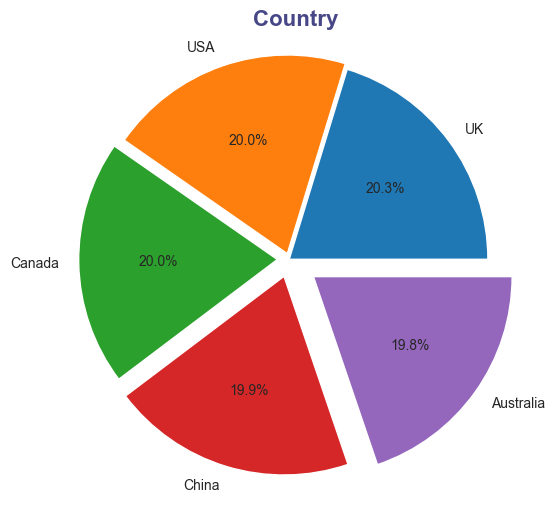

In [40]:
#La distribution de la population dans les pays est quasi-équilibrée.
plt.figure(figsize=(6, 6))
plt.pie(df["Country"].value_counts(), labels=df["Country"].unique(), colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], autopct="%1.1f%%", explode=(0, 0.03, 0.06, 0.09, 0.15))
plt.axis("equal")
plt.title("Country", fontsize=16, weight='bold', color="#474787")
plt.show()

In [41]:
df_map = df.copy()
df_map["Country"].replace(["USA", "UK"],["United States of America", "United Kingdom"], inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_17752\191763609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_map["Country"].replace(["USA", "UK"],["United States of America", "United Kingdom"], inplace = True)


C:\Users\pc\AppData\Local\Temp\ipykernel_17752\2181638189.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\pc\AppData\Local\Temp\ipykernel_17752\2181638189.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(filtered_data.geometry.centroid.x, filtered_data.geometry.centroid.y, filtered_data['name']):


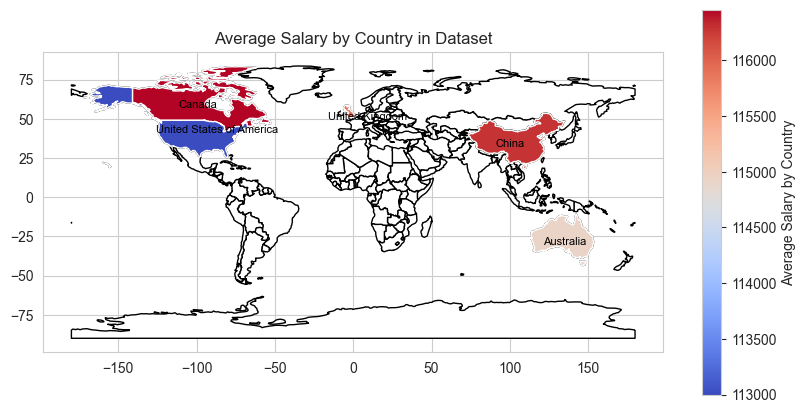

In [43]:
#On constate que le Canada offre le meilleur salaire.

import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_data = df_map['Country'].value_counts().rename_axis('country').reset_index(name='counts')

average_salary = df_map.groupby('Country')['Salary'].mean().reset_index()

merged_with_salary = world.merge(average_salary, how='left', left_on='name', right_on='Country')

countries_to_label = df_map["Country"].unique()
filtered_data = merged_with_salary[merged_with_salary['name'].isin(countries_to_label)]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
base = world.plot(ax=ax, color='white', edgecolor='black')
merged_with_salary.plot(ax=base, column='Salary', cmap='coolwarm', legend=True,
                                 legend_kwds={'label': "Average Salary by Country"})

for x, y, label in zip(filtered_data.geometry.centroid.x, filtered_data.geometry.centroid.y, filtered_data['name']):
    ax.annotate(label, xy=(x, y), xytext=(-15, -5), textcoords="offset points", fontsize=8, color='black')


plt.title('Average Salary by Country in Dataset')
plt.show()

In [17]:
#résumé de ce qu'on a vu

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
from bokeh.models.widgets import Tabs, Panel


# Activer l'affichage dans le notebook
output_notebook()

# Créer une source de données Bokeh
source = ColumnDataSource(df)

# Créer une figure pour le nuage de points interactif pour l'âge et le salaire
p1 = figure(title="Relation entre l'âge et le salaire", x_axis_label='Âge', y_axis_label='Salaire')
p1.circle('Age', 'Salary', source=source)

# Créer une figure pour le diagramme en barres interactif pour le salaire par pays
p2 = figure(title='Salaire par pays', x_range=df['Country'].unique(), x_axis_label='Pays', y_axis_label='Salaire')
p2.vbar(x='Country', top='Salary', width=0.5, source=source)

# Créer une figure pour le nuage de points interactif pour les années d'expérience et le salaire
p3 = figure(title="Relation entre les années d'expérience et le salaire", x_axis_label='Années d\'expérience', y_axis_label='Salaire')
p3.circle('Years of Experience', 'Salary', source=source)

# Créer des panneaux pour chaque figure
panel1 = Panel(child=p1, title="Relation Âge-Salaire")
panel2 = Panel(child=p2, title="Salaire par Pays")
panel3 = Panel(child=p3, title="Relation Expérience-Salaire")

# Créer des onglets pour les panneaux
tabs = Tabs(tabs=[panel1, panel2, panel3])

# Afficher les onglets
show(tabs)



Loading BokehJS ...